# Kerasによるニューラルネット実装例(Gray)

In [33]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import cifar10
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# データセット抽出用の関数
def select_data(label_list):
    # row data load
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    # label name : label num
    label_name_dict = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
      
    # データ抽出 & ラベルデータ成形
    X_train = []
    class_num = len(label_list)
    for e,i in enumerate(label_list):
        label_num = label_name_dict[i]
        one_hot_array = keras.utils.to_categorical(e, class_num)
        
        if X_train == []:
            X_train = x_train[np.where(y_train==label_num)[0]]
            X_test = x_test[np.where(y_test==label_num)[0]]
            Y_train = np.tile(one_hot_array,(len(y_train[np.where(y_train==label_num)[0]]),1))
            Y_test = np.tile(one_hot_array, (len(y_test[np.where(y_test==label_num)[0]]),1))
        else:
            X_train = np.append(X_train,x_train[np.where(y_train==label_num)[0]],axis=0)
            X_test = np.append(X_test,x_test[np.where(y_test==label_num)[0]],axis=0)
            Y_train = np.append(Y_train,np.tile(one_hot_array,(len(y_train[np.where(y_train==label_num)[0]]),1)),axis=0)
            Y_test = np.append(Y_test,np.tile(one_hot_array,(len(y_test[np.where(y_test==label_num)[0]]),1)),axis=0)
            
    return ((X_train,Y_train),(X_test, Y_test))

In [29]:
# 自分で設定するパラメータ
batch_size = 128
select_label = ['airplane','automobile','bird']
num_classes = len(select_label)
epochs = 50

In [30]:
# データ抽出
((x_train,y_train),(x_test, y_test)) = select_data(['airplane','automobile','bird'])

# データ整形
## x_trainをグレースケールに変換する
x_train =np.array([np.asarray(Image.fromarray(np.uint8(i)).convert('L')) for i in x_train])
## x_trainを行列からベクトルにする
x_train = x_train.reshape(x_train.shape[0],32*32)

## x_testをグレースケールに変換する
x_test =np.array([np.asarray(Image.fromarray(np.uint8(i)).convert('L')) for i in x_test])
## x_testを行列からベクトルにする
x_test = x_test.reshape(x_test.shape[0],32*32)

## x_train, x_testを正規化する
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## データシェイプの確認
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

/Users/kazuki/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


(15000, 1024) train samples
(3000, 1024) test samples


In [8]:
# モデル構築
model = Sequential()

# 最初の隠れ層(入力1024-> 出力512)
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.2))

# 隠れ層(入力512 -> 出力512)
## 隠れ層は追加可能
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 出力層(入力512 -> 出力:クラス数)
model.add(Dense(num_classes, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
              optimizer='adam',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコア計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/Users/kazuki/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


(15000, 1024) train samples
(3000, 1024) test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 788,995
Trainable params: 788,995
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 3000 samples
Epoch 1/50
15000/15000 [=========

NameError: name 'plt' is not defined

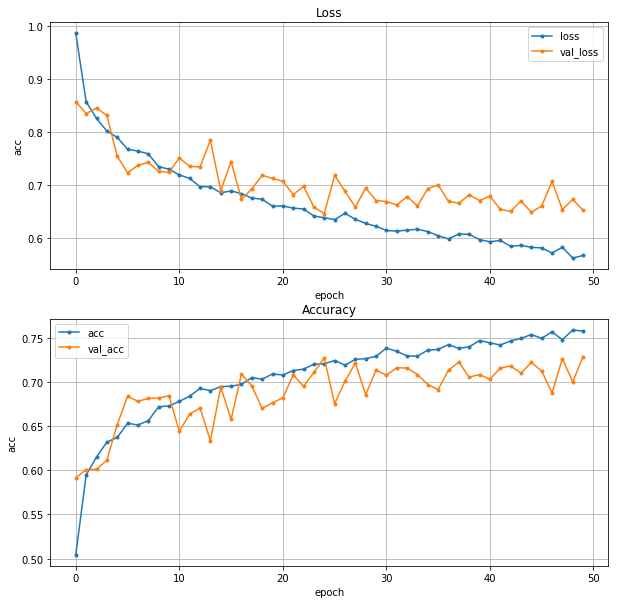

In [32]:
import matplotlib.pyplot as plt
# plot results
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.savefig('rms_cifar3_50epochs.png')

In [7]:
# 学習モデルの保存
model.save("trained_data")

# モデルのテスト

(32, 32)


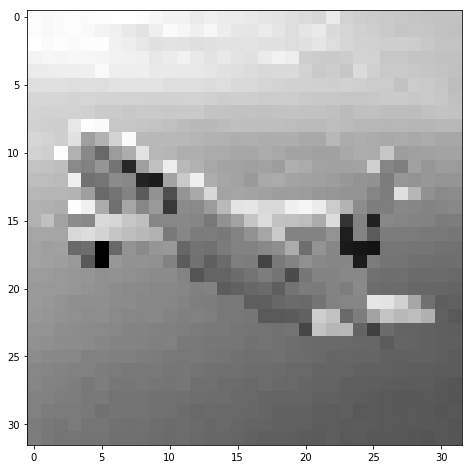

In [27]:
# 画像読み込み
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

fig = plt.figure(figsize=(8,8))

#画像の読み込み
org_img = Image.open("./plane_test3.jpg")

#解像度変更
gray_img = org_img.resize((32,32))
gray_img = gray_img.convert('L')

#画像をarrayに変換
im_list = np.array(gray_img, 'f')
print(im_list.shape)

#正規化
im_list = im_list/255

#画像表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

In [28]:
# 読み込んだ画像の判別

print(im_list.shape)
test = im_list.reshape(1,1024)

# 判別値の確率
print(model.predict(test))

#判別結果
print("result:",select_label[np.argmax(model.predict(test)[0])])

(32, 32)
[[ 0.71074355  0.02313305  0.26612338]]
result: airplane
